In [87]:
#!wget http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v2_coco_2018_03_29.tar.gz
#!tar -xvf ssd_mobilenet_v2_coco_2018_03_29.tar.gz


x ssd_mobilenet_v2_coco_2018_03_29/checkpoint
x ssd_mobilenet_v2_coco_2018_03_29/model.ckpt.meta
x ssd_mobilenet_v2_coco_2018_03_29/pipeline.config
x ssd_mobilenet_v2_coco_2018_03_29/saved_model/saved_model.pb
x ssd_mobilenet_v2_coco_2018_03_29/frozen_inference_graph.pb
x ssd_mobilenet_v2_coco_2018_03_29/saved_model/
x ssd_mobilenet_v2_coco_2018_03_29/saved_model/variables/
x ssd_mobilenet_v2_coco_2018_03_29/model.ckpt.index
x ssd_mobilenet_v2_coco_2018_03_29/
x ssd_mobilenet_v2_coco_2018_03_29/model.ckpt.data-00000-of-00001


In [88]:
import cv2
import numpy as np
import tensorflow as tf

# Load the pre-trained model
model = tf.saved_model.load('ssd_mobilenet_v2_coco_2018_03_29/saved_model')


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [89]:
def detect_objects(image, label_map):
    # Resize the image to the expected input size of the model
    input_image = cv2.resize(image, (224, 224))
    
    # Convert the image to RGB format
    image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
    
    # Convert the image to a TensorFlow tensor
    input_tensor = tf.convert_to_tensor(image_rgb)
    input_tensor = input_tensor[tf.newaxis, ...]
    
    # Run the object detection model
    detections = model.signatures['serving_default'](input_tensor)
    #print(detections['num_detections'])
    # Extract the necessary information from the detections
    num_detections = int(detections['num_detections'][0])
    #print(num_detections)
    for key, value in detections.items():
        if key != 'num_detections':
            detections[key] = value[0, :num_detections].numpy()
    #detections = {key: value[0, :num_detections].numpy() for key, value in detections.items()}
    detections['num_detections'] = num_detections
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)
    
    # Draw bounding boxes on the image
    image_with_boxes = image.copy()
    height, width, _ = image_with_boxes.shape
    for i in range(num_detections):
        class_id = int(detections['detection_classes'][i])
        score = detections['detection_scores'][i]
        bbox = detections['detection_boxes'][i]
        ymin, xmin, ymax, xmax = bbox
        xmin = int(xmin * width)
        xmax = int(xmax * width)
        ymin = int(ymin * height)
        ymax = int(ymax * height)
        
        
        # Get the label corresponding to the class_id
        label = label_map[class_id]

        # Create label text
        label_text = f"{label} {score:.2f}"

        # Draw bounding box rectangle and label
        cv2.rectangle(image_with_boxes, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
        cv2.putText(image_with_boxes, label_text, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    
    return image_with_boxes




In [90]:
label_map = {
    1: 'person',
    2: 'bicycle',
    3: 'car',
    4: 'motorcycle',
    5: 'airplane',
    6: 'bus',
    7: 'train',
    8: 'truck',
    9: 'boat',
    10: 'traffic light',
    11: 'fire hydrant',
    13: 'stop sign',
    14: 'parking meter',
    15: 'bench',
    16: 'bird',
    17: 'cat',
    18: 'dog',
    19: 'horse',
    20: 'sheep',
    21: 'cow',
    22: 'elephant',
    23: 'bear',
    24: 'zebra',
    25: 'giraffe',
    27: 'backpack',
    28: 'umbrella',
    31: 'handbag',
    32: 'tie',
    33: 'suitcase',
    34: 'frisbee',
    35: 'skis',
    36: 'snowboard',
    37: 'sports ball',
    38: 'kite',
    39: 'baseball bat',
    40: 'baseball glove',
    41: 'skateboard',
    42: 'surfboard',
    43: 'tennis racket',
    44: 'bottle',
    46: 'wine glass',
    47: 'cup',
    48: 'fork',
    49: 'knife',
    50: 'spoon',
    51: 'bowl',
    52: 'banana',
    53: 'apple',
    54: 'sandwich',
    55: 'orange',
    56: 'broccoli',
    57: 'carrot',
    58: 'hot dog',
    59: 'pizza',
    60: 'donut',
    61: 'cake',
    62: 'chair',
    63: 'couch',
    64: 'potted plant',
    65: 'bed',
    67: 'dining table',
    70: 'toilet',
    72: 'tv',
    73: 'laptop',
    74: 'mouse',
    75: 'remote',
    76: 'keyboard',
    77: 'cell phone',
    78: 'microwave',
    79: 'oven',
    80: 'toaster',
    81: 'sink',
    82: 'refrigerator',
    84: 'book',
    85: 'clock',
    86: 'vase'
}


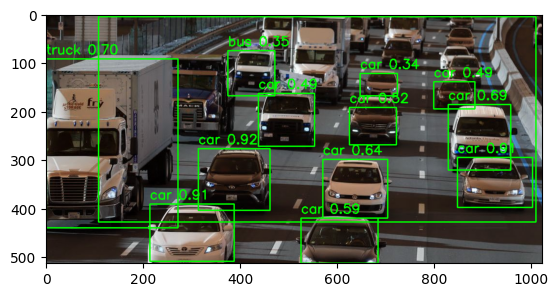

In [94]:
import matplotlib.pyplot as plt
image_path = 'images/2.jpg'
image = cv2.imread(image_path)
image_with_boxes = detect_objects(image,label_map)

#cv2.imshow('Original Image', image)
# Define the desired window size
window_width = 900
window_height = 600

# Create a named window
cv2.namedWindow('Image with Bounding Boxes', cv2.WINDOW_NORMAL)

# Resize the window
cv2.resizeWindow('Image with Bounding Boxes', window_width, window_height)

# Display the image with bounding boxes
cv2.imshow('Image with Bounding Boxes', image_with_boxes)
plt.imshow(image_with_boxes)

